<a href="https://colab.research.google.com/github/MuthomiTed/Electric-Car-Usage-over-Time/blob/master/Moringa_Data_Science_Prep_W4_Independent_Project_2019_07_Ted_Muthomi_Python_SQL_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = "black"> WEEK 4: INDEPENDENT PROJECT

## <font  color = "green"> Project Description

 As a data scientist working for an electric car-sharing service company, process stations data to understand electric car usage over time by solving for the following research question;
 
 Research Question:

##Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018

##Bonus Questions:

a. What is the most popular hour for returning cars?

b. What station is the most popular overall:
         i. Overall?
         ii. At the most popular picking hour?
c. What postal code is the most popular for picking up Bluecars? Does the most popular station belong to that postal code?
       i. Overall?
       ii. At the most popular picking hour?

d. Do the results change if you consider Utilib and Utilib 1.4 instead of Bluecars? (that could be asked earlier to push students to write modular code that can be used to query different things)

## <font color = "green"> Importing Libraries 

In [0]:
# Let's import the pandas library and Numpy library
# 
import pandas as pd

import numpy as np

import csv

import sqlite3

from sqlalchemy import create_engine



In [2]:
import pandas as pd

df_url = 'http://bit.ly/Autolibdataset'

electriccar = pd.read_csv(df_url, index_col = 0, dtype = {'year':str,'month':str,'day':str,'hour':str,'minute':str })

electriccar.tail(1)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
1072,1 rue AndrÃ© Theuriet,1,1,0,0,0,nonexistent,Bourg-la-Reine,NaN,bourglareine-andretheuriet-1,SPACE,"48.7797297, 2.3131491",92340,Bourg-la-Reine/AndrÃ© Theuriet/1,operational,NaN,4,full_station,ok,operational,2018,04,09,23,59


## <font color = "brown"> Data Cleaning

### <font color = 'blue'> Renaming columns

In [0]:
# Renaming columns


electriccar.columns= [	'address'	,'cars',	'bluecar_counter',	'Utilib_counter',	'utilib__model_14_counter',	'charge_slots',	'charging_status',	'city',	'displayed_comment',	'ID',	'kind',	'geo_point',	'postal_code',	'public_name',	'rental_status',	'scheduled_at',	'slots',	'station_type',	'status',	'subscription_status',	'year',	'month',	'day',	'hour',	'minute']

In [0]:
# Shape of our dataset
electriccar.shape

(14421829, 25)

###<font color = 'blue'> dropping unnecessary columns 

In [0]:
# Dropping unnecessary columns

electriccar.drop(['address','scheduled_at','displayed_comment','charge_slots','charging_status','geo_point'],axis=1, inplace = True)

In [0]:
# Dropping extra columns

electriccar.drop(['slots','kind','status','subscription_status','station_type','rental_status'],axis = 1, inplace = True)

###<font color = 'blue'> merging date and time values to date_time format

In [0]:
electriccar['date'] = electriccar.year.str.cat([electriccar.month,electriccar.day], sep = '/')

In [0]:
electriccar['time'] = electriccar.hour.str.cat([electriccar.minute], sep = ':')

In [0]:
electriccar['date_time'] = electriccar.date.str.cat([electriccar.time], sep = ' ')

In [0]:
electriccar.drop(['year','month',	'day', 'minute','hour',	'date',	'time'],axis = 1, inplace = True)

###<font color = 'blue'> sampling values

In [0]:
electriccar = electriccar.sample(5000000, replace = True, random_state = 0 )


### <font color = 'blue'> saving cleaned data to csv

In [0]:
electriccar.to_csv('electriccar_clean.csv')

### <font color = 'blue'> loading our dataset to a csv database 

In [12]:
import os

csv_database = create_engine('sqlite:////csv_database.db')
chunk_size = 1000000
i = 0
j = 0
for df in pd.read_csv('electriccar_clean.csv', chunksize = chunk_size, iterator = True):
  df = df.rename(columns = {c: c.replace(' ','') for c in df.columns})
  df.index += j
  
  df.to_sql('electriccar', csv_database, if_exists = 'append' )
  j = df.index[-1]+1
  
  print(' | index: {}'.format(j))

 | index: 1000000
 | index: 3000000
 | index: 6000000
 | index: 10000000
 | index: 15000000


In [0]:
csv_database = create_engine('sqlite:////csv_database.db')
electriccar.to_sql('electriccar', csv_database, if_exists = 'append' )

### <font color = 'blue'> retrieving data from database

In [0]:
electriccar = pd.read_sql_query('SELECT * from electriccar WHERE city == "Paris" ', csv_database)

In [14]:
electriccar.city.unique()

array(['Paris'], dtype=object)

In [15]:
electriccar.tail(1)

,index,Unnamed:0,cars,bluecar_counter,Utilib_counter,utilib__model_14_counter,city,ID,postal_code,public_name,date_time
2730171,14999999,877,6,6,0,0,Paris,paris-jonquiere-66,75017,Paris/JonquiÃ¨re/66,2018/04/04 02:57


In [0]:
electriccar.drop(['index',	'Unnamed:0'],axis = 1, inplace = True)

In [0]:
electriccar = electriccar.to_csv('electriccar_final.csv')

## <font color = brown> Analysis

###<font color = 'blue'> loading our dataset

In [0]:
pip install chardet

In [0]:
# Lets find out which encoding our file has been saved in.

import chardet
import pandas as pd

def find_encoding(fname):
  r_file = open(fname, 'rb').read()
  result = chardet.detect(r_file)
  charenc = result['encoding']
  return charenc

my_encoding = find_encoding('electriccar_final.csv')

In [133]:
# Lets load our data from our saved csv file


with open ('electriccar_final.csv', 'r') as f:
  electriccar = pd.read_csv(f, parse_dates = ['date_time'], infer_datetime_format = True, index_col = 0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
electriccar.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [93]:
# Here we check for the row count per column

electriccar.count()

cars                        2730172
bluecar_counter             2730172
Utilib_counter              2730172
utilib__model_14_counter    2730172
city                        2730172
ID                          2730172
postal_code                 2730172
public_name                 2730172
dtype: int64

In [94]:
# Lets check for our column types

electriccar.dtypes

cars                         int64
bluecar_counter              int64
Utilib_counter               int64
utilib__model_14_counter     int64
city                        object
ID                          object
postal_code                  int64
public_name                 object
dtype: object

In [0]:
electriccar['total_cars'] = electriccar.iloc[:,0:4].sum(axis =1)

### <font color = 'blue'> analysing column for trends

In [146]:
# What is the most popular hour for returning cars

x = electriccar.groupby([electriccar.date_time.dt.hour])['total_cars'].sum()
print(x)
#.plot(kind = 'bar')
#.sort_values(ascending =False)

                                                            

date_time
0     405776
1     414944
2     462824
3     470822
4     467608
5     478472
6     481281
7     469258
8     436263
9     437904
10    454779
11    446793
12    417101
13    424026
14    428365
15    417357
16    409455
17    399432
18    390098
19    377522
20    404413
21    454581
22    442954
23    404166
Name: total_cars, dtype: int64


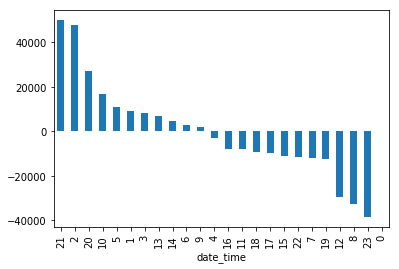

In [149]:
x.diff().sort_values(ascending = False).plot(kind = 'bar')

In [151]:
# Most popular station overall

electriccar.groupby(['ID','postal_code' ])['total_cars'].sum().sort_values(ascending = False).head(5)

ID                               postal_code
paris-portesaintcloud-parking    75016          47824
paris-versaillesreynaud-parking  75016          47406
paris-picpusnation-parking       75012          45498
paris-gouvionmaillot-parking     75017          41535
paris-henrimartin-70             75116          41500
Name: total_cars, dtype: int64

In [127]:
# Most popular station at most popular picking hour


electriccar.between_time('22:00','23:59').groupby(['ID'])['total_cars'].sum().sort_values(ascending = False).head(3)

ID
paris-renault-2         4147
paris-botzaris-50       3979
paris-ternes-parking    3628
Name: total_cars, dtype: int64

In [103]:
# Most popular postal code for picking up Bluecars Overall


electriccar.groupby(['postal_code'])['bluecar_counter'].sum().sort_values(ascending = False).head(13)

postal_code
75015    600717
75016    579580
75017    464375
75020    453767
75019    368776
75013    335130
75012    307955
75014    296913
75018    292279
75011    278492
75010    176941
75008    172646
75007    145200
Name: bluecar_counter, dtype: int64

In [128]:
# Most popular postal code for picking up Bluecars at most popular car picking hour


electriccar.between_time('22:00','23:59').groupby(['postal_code'])['bluecar_counter'].sum().sort_values(ascending = False).head(20)

postal_code
75015    46995
75017    41803
75020    41377
75016    40637
75019    33142
75018    31782
75011    28706
75013    24190
75014    22223
75012    22051
75010    15089
75009    12102
75005    11132
75007     8885
75008     7516
75003     7189
75006     3531
75004     2639
75002     1832
75116     1481
Name: bluecar_counter, dtype: int64

In [107]:
# Most popular postal code for picking up Utilib Overall


electriccar.groupby(['postal_code'])['Utilib_counter'].sum().sort_values(ascending = False).head(20)

postal_code
75015    19180
75016    17549
75017    12153
75013    11899
75020    11169
75014    10873
75019     8839
75012     7591
75008     7541
75018     7016
75011     6536
75007     5224
75009     5106
75010     3974
75005     2819
75002     1878
75003     1861
75004     1400
75006     1215
75001      880
Name: Utilib_counter, dtype: int64

In [129]:
# Most popular postal code for picking up Utilib at the most popular car picking hour


electriccar.between_time('22:00','23:59').groupby(['postal_code'])['Utilib_counter'].sum().sort_values(ascending = False).head(20)

postal_code
75015    1406
75016    1207
75017    1058
75020     946
75014     863
75019     836
75013     672
75018     633
75010     509
75011     495
75007     465
75009     402
75012     331
75008     231
75006     198
75005     189
75001     122
75003     100
75004      74
75002      30
Name: Utilib_counter, dtype: int64

###<font color = 'blue'> final results

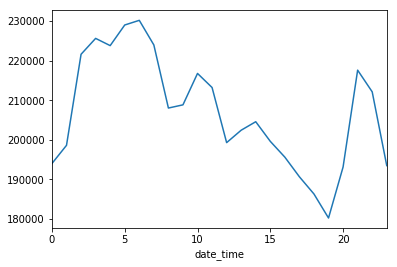

In [142]:
# The most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018

y = electriccar.groupby([electriccar.date_time.dt.hour])['bluecar_counter'].sum().plot()


In [141]:
y.diff().sort_values(ascending = False)

date_time
21    24495.0
2     23026.0
20    12898.0
10     7944.0
5      5216.0
1      4608.0
3      4018.0
13     3146.0
14     2143.0
6      1179.0
9       808.0
4     -1830.0
11    -3562.0
16    -3997.0
18    -4351.0
15    -4966.0
17    -4967.0
22    -5481.0
19    -6072.0
7     -6226.0
12   -13939.0
8    -15955.0
23   -18661.0
0         NaN
Name: bluecar_counter, dtype: float64

In [130]:
# Preview of final dataset
electriccar[0:7]

,cars,bluecar_counter,Utilib_counter,utilib__model_14_counter,city,ID,postal_code,public_name,total_cars
date_time,,,,,,,,,
2018-04-06 02:48:00,0,0,0,0,Paris,paris-clichy-181,75017,Paris/Clichy/181,0
2018-04-01 21:53:00,0,0,0,0,Paris,paris-victoire-76,75009,Paris/Victoire/76,0
2018-04-06 01:16:00,4,4,0,0,Paris,paris-vauvenargues-35,75018,Paris/Vauvenargues/35,8
2018-04-05 16:45:00,1,1,0,0,Paris,paris-reuilly-116,75012,Paris/Reuilly/116,2
2018-04-04 14:20:00,0,0,0,0,Paris,paris-pontlouisphilippe-24,75004,Paris/Pont Louis-Philippe/24,0
2018-04-01 05:31:00,0,0,0,0,Paris,paris-iena-24,75016,Paris/IÃ©na/24,0
2018-04-04 00:43:00,3,3,0,0,Paris,paris-jeandelafontaine-42,75016,Paris/Jean de la Fontaine/42,6
